In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## 1) Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from helpers import *
from data_modification import replace_by_mean
import matplotlib.pyplot as plt

""" Load TRAINING data """
DATA_TRAIN_PATH = '../data/train.csv'
y, raw_tx, ids = load_csv_data(DATA_TRAIN_PATH)

y = y[:,np.newaxis]

# Replace -999 by the mean of its respective column
processed_tx = replace_by_mean(raw_tx)

# Standardize (subtract mean and divive by standard deviation)
processed_tx,mean_pr_tx,std_pr_tx = standardize(processed_tx)

""" Load TEST data """
DATA_TEST_PATH = '../data/test.csv' # download test data and supply path here 
_, raw_tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

processed_tx_test = replace_by_mean(raw_tX_test)
processed_tx_test = standardize_test(processed_tx_test, mean_pr_tx, std_pr_tx)


## Inter-features correlation plot:

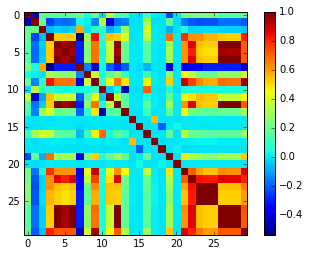

In [18]:
standardized_tx,_,_ = standardize(raw_tx)
R = np.corrcoef(standardized_tx[:,1:], rowvar=0)

plt.imshow(R,interpolation='nearest')
plt.colorbar()
plt.show()

## 2) Regular Ridge regression :

In [11]:
from run_ridge_regression import *

tx = np.copy(processed_tx)

lambdas=np.logspace(-10, 10, 30)
k_fold=10
plot_filename = "images/regular_ridge_regression"

run_ridge_regression(y, tx, lambdas, k_fold, filename=plot_filename)

### 3) Compute weights and adapt test data for submission

In [13]:
from implementations import ridge_regression
lambda_ = 1e-3
weights, loss = ridge_regression(y, tx, lambda_)

tx_test = np.copy(processed_tx_test)

## 2) Ridge regression with polynomial basis functions:

In [29]:
from run_ridge_regression import *
from feature_transformation import *

degrees = [ 2,3,4 ]
k_fold=10
lambdas=np.logspace(-10, 10, 30)

tx = np.copy(processed_tx)

for degree in degrees:
    print("Iteration for degree",degree, "started.")
    plot_filename = "images/ridge_regression_poly_deg_%d" % degree
    tx_poly = build_poly_matrix(np.copy(tx), degree)
    run_ridge_regression(y, tx_poly, lambdas, k_fold, filename=plot_filename)
    print("Iteration for degree",degree, "over.")

Iteration for degree 2 started.
Iteration for degree 2 over.
Iteration for degree 3 started.
Iteration for degree 3 over.
Iteration for degree 4 started.
Iteration for degree 4 over.


### 3) Compute weights and adapt test data for submission

In [6]:
from ridge_regression import ridge_regression
from build_polynomial import *

degree = 2
lambda_ = 1e-3
tx_poly = build_poly_matrix(tx, degree)
weights, loss = ridge_regression(y, tx_poly, lambda_)

tx_test = np.copy(processed_tx_test)
tx_test = build_poly_matrix(tx_test, degree)

ImportError: No module named 'build_polynomial'

## 2) Ridge regression, tx augmented with sin,cos,exp,sinc:

In [6]:
from run_ridge_regression import *
from feature_transformation import *

tx = np.copy(processed_tx)

k_fold=10
lambdas=np.logspace(-10, 10, 30)
plot_filename = "images/ridge_regression_lots_of_func"

tx = add_functions(tx)
run_ridge_regression(y, tx, lambdas, k_fold, filename=plot_filename)

### 3) Compute weights and adapt test data for submission

In [9]:
from implementations import ridge_regression
from feature_transformation import *

lambda_ = 5
weights, loss = ridge_regression(y, tx, lambda_)

tx_test = np.copy(processed_tx_test)
tx_test = add_functions(tx_test)

## 2) Ridge regression, tx augmented with sinc:

In [16]:
from run_ridge_regression import *
from feature_transformation import *

tx = np.copy(processed_tx)

k_fold=10
lambdas=np.logspace(-10, 10, 30)
plot_filename = "images/ridge_regression_sinc"

tx = add_sinc_function(tx)
run_ridge_regression(y, tx, lambdas, k_fold, filename=plot_filename)

### 3) Compute weights and adapt test data for submission

In [17]:
from implementations import ridge_regression
from feature_transformation import *

lambda_ = 0.001
weights, loss = ridge_regression(y, tx, lambda_)

tx_test = np.copy(processed_tx_test)
tx_test = add_sinc_function(tx_test)

## 2) Ridge regression, tx augmented with exp:

In [ ]:
from run_ridge_regression import *
from add_functions_of_features import *

tx = np.copy(processed_tx)

k_fold=10
lambdas=np.logspace(-10, 20, 30)
plot_filename = "ridge_regression_exp"

tx = add_exp_function(tx)
run_ridge_regression(y, tx, lambdas, k_fold, filename=plot_filename)

### 3) Compute weights and adapt test data for submission

In [111]:
from ridge_regression import ridge_regression
from add_functions_of_features import *

lambda_ = 1e-3
weights, loss = ridge_regression(y, tx, lambda_)

tx_test = np.copy(processed_tx_test)
tx_test = add_exp_function(tx_test)

## 4) Generate predictions and save ouput in csv format for submission:

In [18]:
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '../data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)